# Net surgery to produce a `Graph` model for regressing poselets

In [17]:
%matplotlib inline

from keras.optimizers import SGD

import numpy as np

import models
from vggnet.upgrade_weights import upgrade_weights
from vggnet.vgg16_keras import VGG_16

In [12]:
models = reload(models)
solver = SGD()
rgb_shape = (6, 224, 224)
flow_shape = (2, 224, 224)
regressor_outputs = 6
init = 'glorot_normal'

In [3]:
huge = models.vggnet16_poselet_class_flow_norm_bn({
    'images': (6, 224, 224),
    'flow': (2, 224, 224),
    'poselet': (901,)
}, solver, init)

In [4]:
flow_seq = huge.nodes['flow_conv']
rgb_seq = huge.nodes['rgb_conv']
ilsvrc_weights_path = './vggnet/vgg16_weights.h5'
ilsvrc_model = VGG_16(ilsvrc_weights_path)

In [5]:
ol1 = upgrade_weights(flow_seq.layers, ilsvrc_model.layers)
ol2 = upgrade_weights(rgb_seq.layers, ilsvrc_model.layers)
assert ol1 == ol2
old_left = ol1 # Number of layers remaining in the old model

Concatenating old L1 dimensions to change shape, (64, 3, 3, 3)->(64, 1, 3, 3)
First layer done
Skipping BatchNormalization layer in new model
Changing ZeroPadding2D
Changing Convolution2D
Skipping BatchNormalization layer in new model
Changing MaxPooling2D
Changing ZeroPadding2D
Changing Convolution2D
Skipping BatchNormalization layer in new model
Changing ZeroPadding2D
Changing Convolution2D
Skipping BatchNormalization layer in new model
Changing MaxPooling2D
Changing ZeroPadding2D
Changing Convolution2D
Skipping BatchNormalization layer in new model
Changing ZeroPadding2D
Changing Convolution2D
Skipping BatchNormalization layer in new model
Changing ZeroPadding2D
Changing Convolution2D
Skipping BatchNormalization layer in new model
Changing MaxPooling2D
0 new layers ignored and 20 old layers ignored
Concatenating old L1 dimensions to change shape, (64, 3, 3, 3)->(64, 6, 3, 3)
First layer done
Skipping BatchNormalization layer in new model
Changing ZeroPadding2D
Changing Convolution2D

In [30]:
front_layers = len(flow_seq.layers)
assert front_layers == len(rgb_seq.layers), "Flow and RGB pipelines should be same length"
back_ilsvrc_layers = ilsvrc_model.layers[-old_left:]
back_seq = huge.nodes['shared_layers']
upgrade_weights(back_seq.layers, back_ilsvrc_layers)

Concatenating old L1 dimensions to change shape, (512, 256, 3, 3)->(512, 512, 3, 3)
First layer done
Skipping BatchNormalization layer in new model
Changing ZeroPadding2D
Changing Convolution2D
Skipping BatchNormalization layer in new model
Changing ZeroPadding2D
Changing Convolution2D
Skipping BatchNormalization layer in new model
Changing MaxPooling2D
Changing ZeroPadding2D
Changing Convolution2D
Skipping BatchNormalization layer in new model
Changing ZeroPadding2D
Changing Convolution2D
Skipping BatchNormalization layer in new model
Changing ZeroPadding2D
Changing Convolution2D
Skipping BatchNormalization layer in new model
Changing MaxPooling2D
Changing Flatten
Changing Dense
Changing Dropout
Changing Dense
Changing Dropout
0 new layers ignored and 1 old layers ignored


In [31]:
huge.save_weights('vggnet/vgg16-2stream-pslt-clas-norm-bn.h5')

In [19]:
from keras.utils.visualize_util import to_graph

from IPython.display import SVG

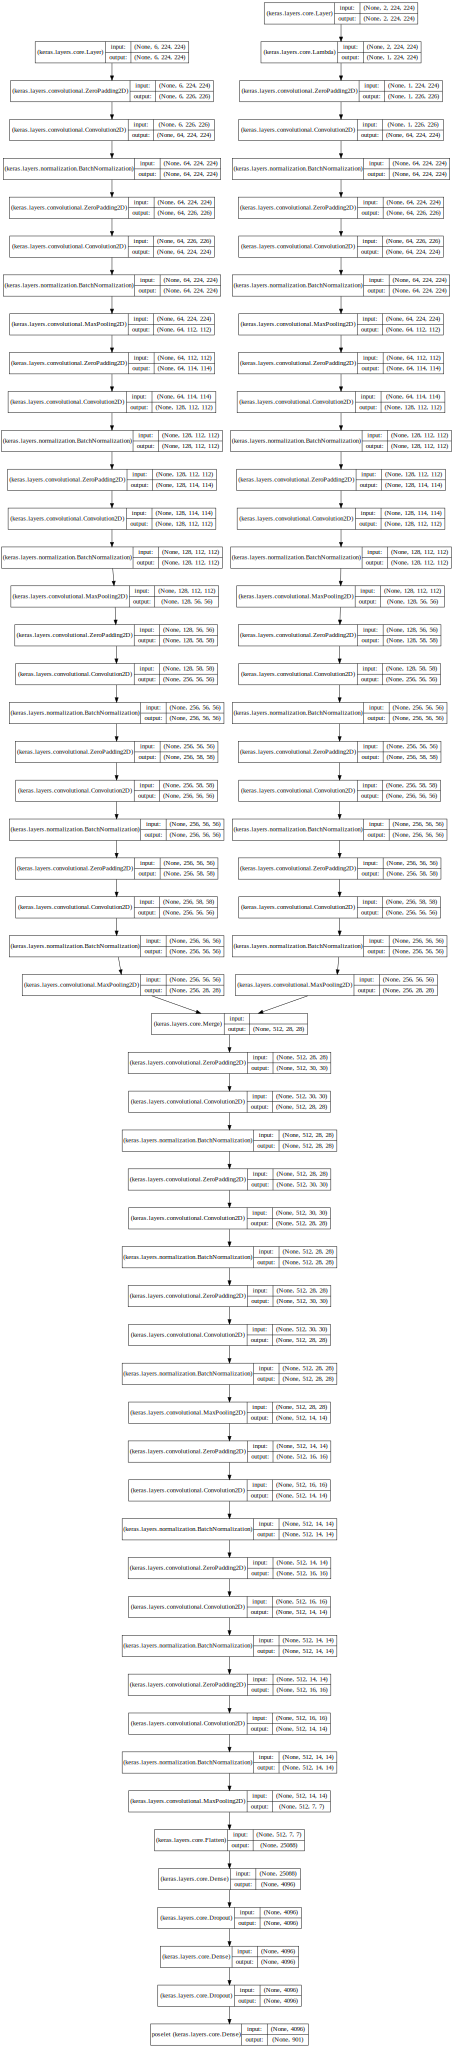

In [32]:
SVG(to_graph(huge, show_shape=True).create_svg())

In [25]:
huge.nodes.layers.keys()

AttributeError: 'OrderedDict' object has no attribute 'layers'

> <ipython-input-25-1c9b0b758727>(1)<module>()
----> 1 huge.nodes.layers.keys()

ipdb> huge.nodes.keys()
['rgb_conv', 'flow_norm', 'flow_conv', 'shared_layers', 'fc_pslt']
ipdb> huge.nodes['shared_layers']
ipdb> q
